# Grand Prix Transportation NF


## Objective and Prerequisites

Grand Prix Transportation wants to find most efficient shipping plan to minimize shipping cost. The objective Grand Prix problem are:

* Ensure number of shippments doesn't exceed plant capacity,
* Demands for each regions should be satisfied, and
* Ensure that number of shippments are valid, i.e., non- negative shipping.

## Problem Description

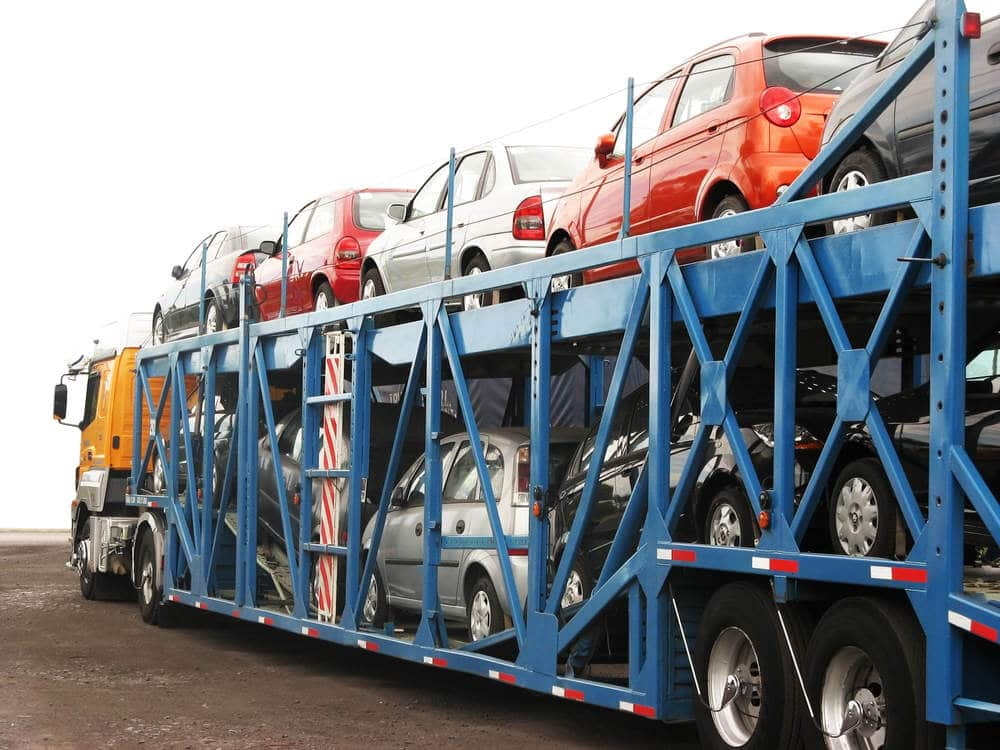
The Grand Prix Automobile Company manufactures
automobiles in three plants and then ships them to four
regions of the country. The plants can supply the
amounts listed in the right column of the following table. The customer demands by region are listed in the
bottom row of this table, and the unit costs of shipping an
automobile from each plant to each region are listed in
the middle of the table. Grand Prix wants to find the lowest-cost shipping plan for meeting the demands of the four regions without
exceeding the capacities of the plants.

The Shipping cost for each plants and demand for each regions are as follows:



|Plant  |Region 1|  Region 2|  Region 3|  Region 4|  Capacity|
|-------|--------|----------|----------|----------|----------|
|Plant 1|    \$131|      \$218|     \$266 |     \$120 |     450  |
|Plant 2|    \$250|      \$116|      \$263|      \$278|     600  |
|Plant 3|    \$178|      \$132|     \$122 |     \$180 |     500  |
|Demand |    450 |      200 |      300 |      300 |          |   

## Model Formulation

---

### Input Parameters

$i \in \{1..3\}$ : index to represent plants

$j \in \{1..4\}$: index to represent regions


$k_{i}$: Capacity of plant 𝑖. [e.g., 𝑘_1=450]

$d_{j}$: Demand of region 𝑗. [e.g., 𝑑_2=200]

$c_{ij}$: Unit shipping cost from plant 𝑖 to region 𝑗. [e.g., 𝑐_13=$266]


### Decision Variables

$x_{ij}$: How much to ship from plant 𝑖 to region 𝑗



### Objective Function
\begin{equation}
\text{Min}_{x_{ij}}
\quad \sum_{i \in \{1..3\}} \sum_{j \in \{1..4\}} c_{ij}*x_{ij} \text{    [minimize total cost]	}
\end{equation}



### Constraints

(1)\begin{equation}
\sum_{j \in \{1,2,3,4\}} x_{ij} \leq k_{i}, i \in \{1,2,3\}\text{    [Shippment Cannot Exceed Capacity]	}
\end{equation}

(2) \begin{equation}
\sum_{i \in \{1,2,3\}} x_{ij} \geq d_{j}, j \in \{1,2,3,4\}\text{   [satisfy region demand]	}
\end{equation}


(3)  \begin{equation}
x_{ij} \geq 0, i \in \{1,2,3\},j \in \{1,2,3,4\}\text{   [non-negative shipping]	}
\end{equation}
   


In [3]:
!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp
from gurobipy import *  # import the optimize solver Gurobi

In [4]:
# setup the model
m = Model()

# inputs

plants = 3
regions = 4

k = [450, 600, 500]  # Capacity of plants i.e [1,2,3]
d = [450, 200, 300, 300] # Demand of each Region i.e [1,2,3,4]
c = [[131, 218, 266, 120], # Unit shipping cost from plant 1 to regions 1,2,3,4
       [250, 116, 263, 278], # Unit shipping cost from plant 2 to regions 1,2,3,4
       [178, 132, 122, 180] # Unit shipping cost from plant 3 to regions 1,2,3,4
       ]

# decisions

nx = []
for i in range(plants):
  l = []
  for j in range(regions):
    if i == 0:
      l.append(m.addVar(vtype=GRB.CONTINUOUS, name='Plant1 to {}'.format(j + 1)))
    elif i == 1:
      l.append(m.addVar(vtype=GRB.CONTINUOUS, name='Plant2 to {}'.format(j + 1)))
    elif i == 2:
      l.append(m.addVar(vtype=GRB.CONTINUOUS, name='Plant3 to {}'.format(j + 1)))
    elif i == 3:
      l.append(m.addVar(vtype=GRB.CONTINUOUS, name='Plant4 to {}'.format(j + 1)))
  nx.append(l)

# Objective

sum = 0
for i in range(plants):
  for j in range(regions):
    sum += c[i][j]*nx[i][j]
m.setObjective(sum, GRB.MINIMIZE)

# constraints

# Set Non Negative Shipping constraint
c3=[]
for i in range(plants):
  for j in range(regions):
    c3.append(m.addConstr(nx[i][j] >= 0))

# Set Capacity constraint
c1=[]
for i in range(plants):
    c1.append(m.addConstr(k[i] >= quicksum([nx[i][j] for j in range(regions)])))

# Set Satisfy Demand constraint
c2=[]
for j in range(regions):
    c2.append(m.addConstr(d[j] <= quicksum([nx[i][j] for i in range(plants)])))

# Run the optimize solver
m.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 19 rows, 12 columns and 36 nonzeros
Model fingerprint: 0x8741c7e9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 6e+02]
Presolve removed 12 rows and 0 columns
Presolve time: 0.02s
Presolved: 7 rows, 12 columns, 24 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.562500e+02   0.000000e+00      0s
       6    1.7605000e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.04 seconds (0.00 work units)
Optimal objective  1.760500000e+05


In [5]:
# Get the Optimal Solution for X
m.printAttr('X')


    Variable            X 
-------------------------
 Plant1 to 1          150 
 Plant1 to 4          300 
 Plant2 to 1          100 
 Plant2 to 2          200 
 Plant3 to 1          200 
 Plant3 to 3          300 


In [6]:
# Get the objective values
m.ObjVal

176050.0